## Audio Test Notebook 

This notebook demonstrates essential Audio I/O utilities provided in the **spchutils.audio** module
- loading audio data from file   
- play audio
- recording audio; can be done via direct control of the sounddevice or using javascript in the browser

Date: 11/04/2021
Last Modification: 10/05/2021

In [1]:
%matplotlib inline
from IPython.display import display, Audio, HTML   
import numpy as np
import matplotlib.pyplot as plt

import librosa
try:
  import google.colab
  IN_COLAB = True
  ! pip install pydub  
  ! pip install git+https://github.com/compi1234/spchutils.git
except:
  IN_COLAB = False

# verify the IPython version
import IPython
if IPython.version_info[0] >= 6:
    Audio_args = {'normalize':False}
else:
    print("Warning: you are using IPython<6 \n IPython.display.Audio() will automatically normalize audio output")
    Audio_args = {}
import spchutils.audio as audio
import spchutils.spectrogram as specg
import spchutils.utils as ut
import spchutils
print(spchutils.__version__)

SAMPLE_WAV_URL = 'https://homes.esat.kuleuven.be/~spchlab/data/misc/train.wav'
SAMPLE_WAV_13dB_SNGER = 'https://homes.esat.kuleuven.be/~spchlab/data/13dB/Psnger22.wav'

0.1.dev0


## 1. Read from file

In [2]:
# You can load a file from url or from local disk, more details in the manpage
help(audio.load)

Help on function load in module spchutils.audio:

load(resource, sample_rate=None, **kwargs)
    This is a tiny wrapper around librosa.load() to accomodate for specifying a resource
    both by url or filename
    
    Parameters:
    -----------
        resource : string          
            url or file name
        sample_rate : int (optional)
            if given, resample to the target sampling rate
        **kwargs 
            extra parameters to be passed to librosa
            e.g. mono(boolean)
            
    Returns:
    --------
        wavdata : float-32 array, shape (n_samples, ) for mono or (n_channels, n_samples)
            the waveform data are scaled to [-1., 1.]
        sample_rate : int
            sampling rate of returned signal



(12880,) 8000


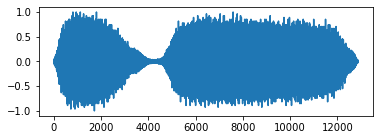

In [3]:
wavname = SAMPLE_WAV_URL
wavdata,sample_rate= audio.load(wavname)
# 
print(wavdata.shape, sample_rate)
fig = plt.figure(figsize=(6,2))
plt.plot(wavdata)
# if you want the plot above the audio widget, add line below
# plt.show()
display(Audio(data=wavdata,rate=sample_rate,autoplay=False,**Audio_args))

(449874,) 16000


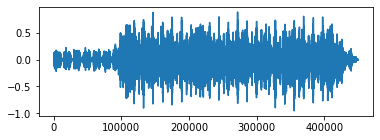

In [4]:
# You can specify a new sampling rate when reading in the data or convert multi to mono
# -- sample_rate=16000
# -- mono=True
wavname = SAMPLE_WAV_13dB_SNGER
#wavname = SAMPLE_WAV_URL
wavdata,sample_rate= audio.load(wavname,sample_rate=16000)
print(wavdata.shape, sample_rate)
fig = plt.figure(figsize=(6,2))
plt.plot(wavdata)
display(Audio(data=wavdata,rate=sample_rate,autoplay=False,**Audio_args))

## 2. Record from device

In [5]:
help(audio.record)

Help on function record in module spchutils.audio:

record(seconds=2.0, sample_rate=16000, n_channels=1, io_device='sd')
    Parameters
    ----------
        seconds : float
            number of seconds to record (default=2.0)
        sample_rate : int
            sampling rate (default=16000)
        n_channels : int
            number of channels to record (default=1)
        io_device : string
            device from which to record (default='sd')
            currently supporting 'sd' or 'js'
            
    Returns
    -------
        wavdata : float-32 array, shape (n_sample,_) or (n_channels, n_samples)
            the waveform data scaled to [-1., 1.]



In [6]:
# you can set sampling rate and number of channels to be recorded
sample_rate=16000
wavdata = audio.record(2.,sample_rate,n_channels=2)
print(wavdata.shape)
#Audio(data=wavdata,rate=sample_rate,**Audio_args)

recording started for 2.00 seconds on 2 channel(s)
recording finished
(2, 32000)


In [7]:
# Remark that the IPython Audio object BY DEFAULT NORMALIZES the output
# The default **Audio_args will overcome that in versions of IPython (>=6) where normalization can be turned off
# Be careful, however, as the Audio module will crash on values exceeding +-1, there is no autoclipping
# Google Colab uses IPython 5.5 !!
# Record something in a soft voice and play both versions below for clear demonstration
if IPython.version_info[0] >= 6:
    display(Audio(data=wavdata,rate=sample_rate,normalize=False))
    display(Audio(data=wavdata,rate=sample_rate,normalize=True))
else:
    print("Warning: in IPython <6 you can only play normalized audio via the Browser !!")
    display(Audio(data=wavdata,rate=sample_rate))

## 3. Multichannel plot and play

In [8]:
# The plot_waveform() routine in the spectrogram module does proper multichannel plotting
#
# a note on librosa: waveform plotting can be display.waveform.waveplot() 
# though only channel by channel 
# > from librosa import display as libdisp
# > libdisp.waveplot(wavdata,sr=sample_rate)


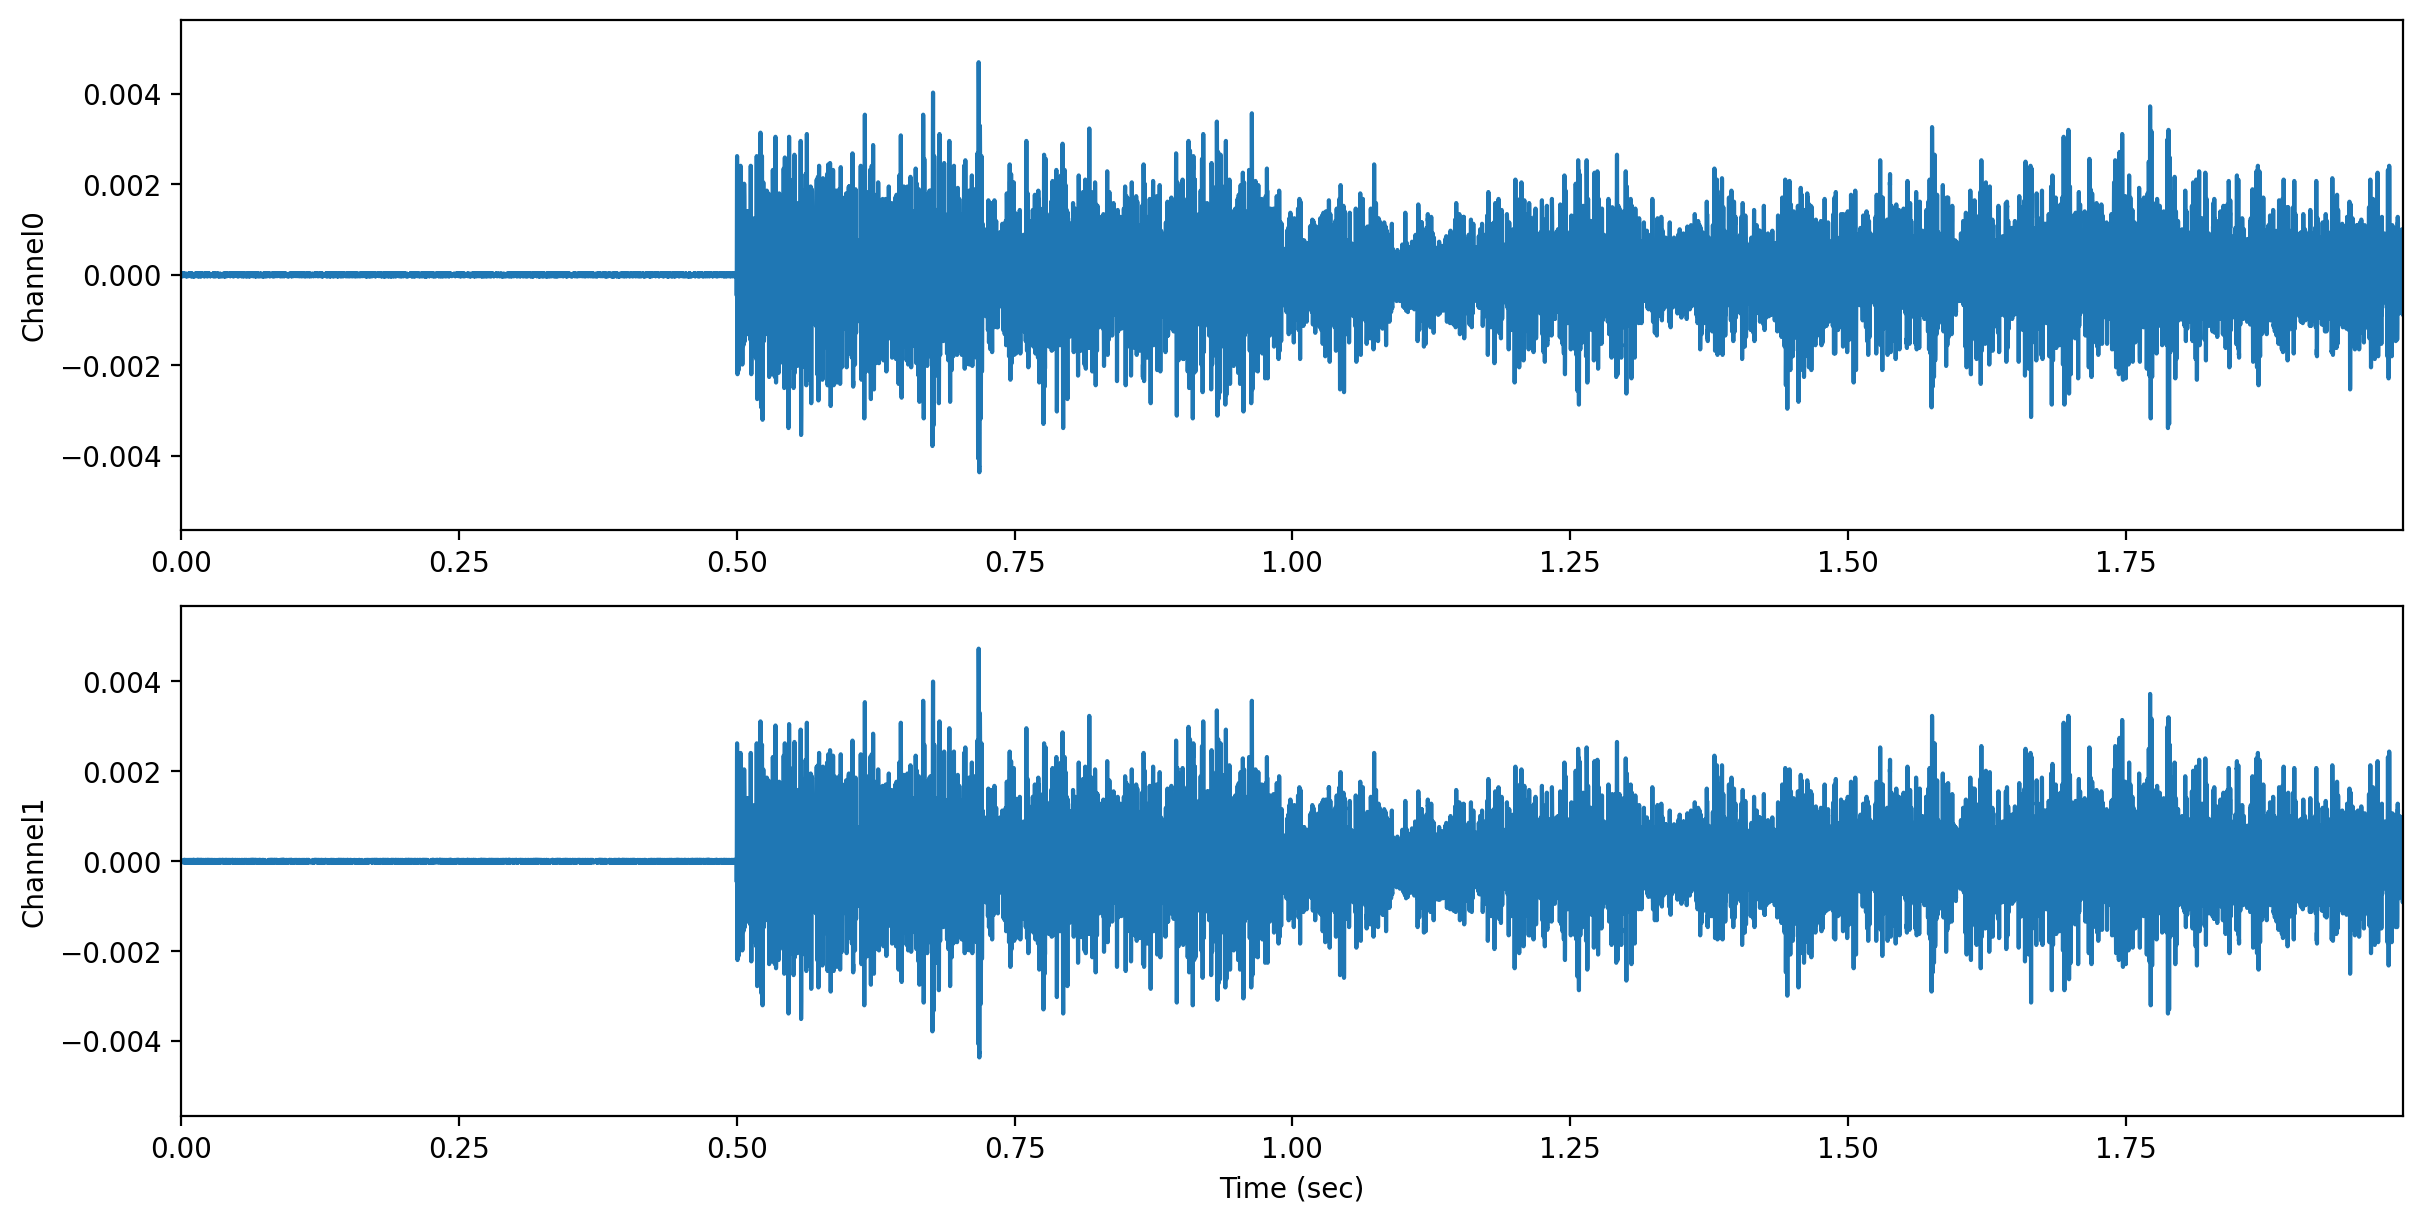

In [9]:
ut.plot_waveform(wavdata,sample_rate)

In [10]:
# just play the (stereo) waveform
# if you want to stage multiple sequential plays in a cell (or python code), 
# then you must wait for each of them to finish before starting the next one

# This will play all channels and wait for audio to finish
audio.play(wavdata,sample_rate=sample_rate,wait=True)

# This plays channel=0 and returns immediately 
audio.play(wavdata,sample_rate=sample_rate,channels=[0])

# This will render an ipython.display object 
audio.play(wavdata,sample_rate=sample_rate,io_device='js')